In [4]:
from N2_func import N2
from ScaleHeight_func import ScaleHeight
from CoriolisParam_func import CoriolisParam
import numpy as np

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_Plots/Files/'
runname='FiducialPlanet/Model4/L10/T42/P0_020'
oom=0     #pressure order of magnitude
surfp=0.2  #surface pressure in bars
grav=21.8   #gravity in m/s2 (can take from fort.7)
gascon=3779.  #R
akap=0.286
WW=8.73*10**-5.  #rotation rate

%matplotlib inline



lat_arr,lon_arr,N2=N2(path,runname,oom, surfp, grav, gascon, akap)
lat_arr,lon_arr,H=ScaleHeight(path,runname,oom,surfp,grav,gascon)
lat_arr,f=CoriolisParam(path,runname,oom,surfp,WW)

  
 ....reading fort.50
       nlat= 64 nlon= 128
       END OF FILE: DONE
(8192, 3)
(128, 64, 3)
  
 ....reading  fort.26
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE


N2_func.py:23: RuntimeWarning: invalid value encountered in multiply
  N2=np.empty(Temp.shape)*0.0


  
 ....reading  fort.26
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.26
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE


In [5]:
Lr=np.sqrt(N2)*H/np.abs(f)
print np.nanmax(H),np.nanmin(H)
print np.nanmax(N2),np.nanmin(N2)
print np.nanmax(f),np.nanmin(f)
print np.nanmax(Lr),np.nanmin(Lr)

68.25251370726433 39.24192805714733
0.00045534255620324277 2.625616333172711e-05
0.00017447868295562225 -0.00017447868295562225
201120.5911001722 1489.4919744760766


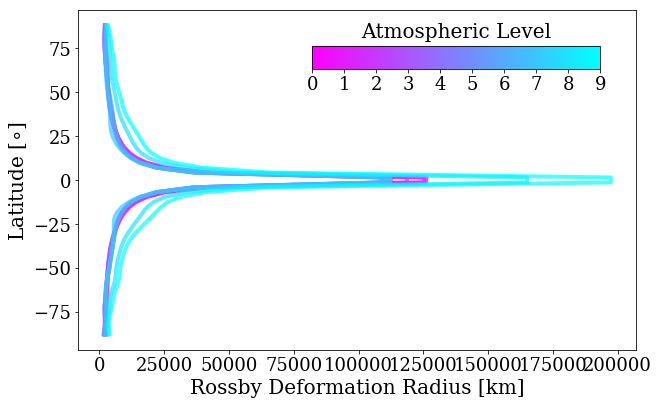

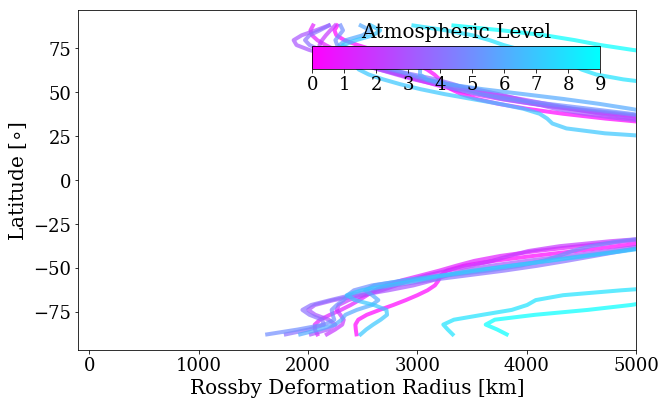

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

from matplotlib.font_manager import FontProperties
params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

colors=plt.cm.cool_r(np.linspace(0, 1, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
norm=matplotlib.colors.Normalize(vmin=0,vmax=Lr.shape[0]-1)                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

fig=plt.figure(1,figsize=(10,6.25))
for l in range(0,Lr.shape[0]):
    plt.plot(Lr[l,0,:],lat_arr,'-',linewidth=4.0,color=scal_m.to_rgba(l),alpha=0.7)
    
plt.ylabel('Latitude [${\circ}$]',fontsize=20)
plt.xlabel('Rossby Deformation Radius [km]',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)  

cbaxes=fig.add_axes([0.45, 0.75, 0.4, 0.05]) 
c=plt.colorbar(scal_m, cax = cbaxes,orientation='horizontal',ticks=np.linspace(0,Lr.shape[0]-1,Lr.shape[0]))  
c.ax.tick_params(labelsize=18)

plt.figtext(0.65,0.82,'Atmospheric Level',fontsize=20,ha='center')

plt.savefig(path+runname+'/RDR_full.png',transparent=True)
plt.show()

fig=plt.figure(2,figsize=(10,6.25))
for l in range(0,Lr.shape[0]):
    plt.plot(Lr[l,0,:],lat_arr,'-',linewidth=4.0,color=scal_m.to_rgba(l),alpha=0.7)
    
plt.ylabel('Latitude [${\circ}$]',fontsize=20)
plt.xlabel('Rossby Deformation Radius [km]',fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)  
plt.xlim(-100,5000)

cbaxes=fig.add_axes([0.45, 0.75, 0.4, 0.05]) 
c=plt.colorbar(scal_m, cax = cbaxes,orientation='horizontal',ticks=np.linspace(0,Lr.shape[0]-1,Lr.shape[0]))  
c.ax.tick_params(labelsize=18)

plt.figtext(0.65,0.82,'Atmospheric Level',fontsize=20,ha='center')


plt.savefig(path+runname+'/RDR_zoom.png',transparent=True)
plt.show()